In [ ]:
import pandas as pd
import numpy as np
first = pd.read_csv("first.csv")
second = pd.read_csv("sec.csv")
wine = first.append(second)
import seaborn as sns

In [ ]:
wine[1].head(5)

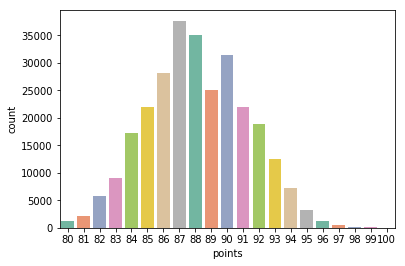

In [76]:
sns.countplot(wine['points'],palette='Set2')

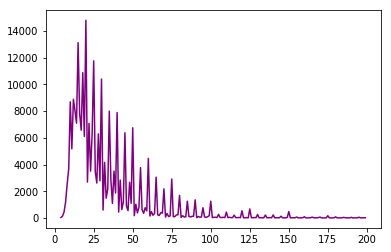

In [78]:
wine[wine['price'] < 200]['price'].value_counts().sort_index().plot.line(color = 'purple')

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


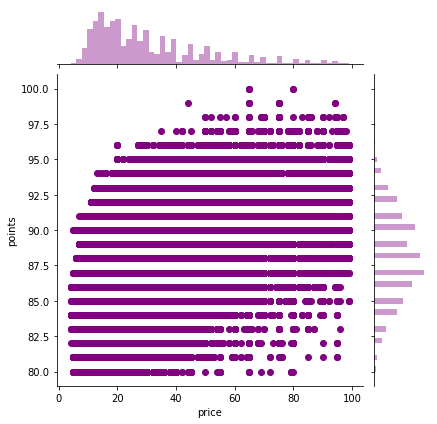

In [80]:
sns.jointplot(x='price', y='points', data=wine[wine['price'] < 100], color = 'purple')

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


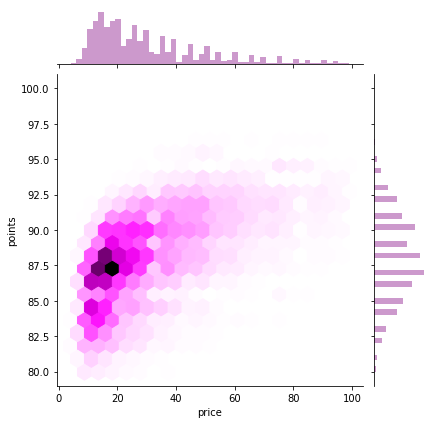

In [39]:
sns.jointplot(x='price', y='points', data=wine[wine['price'] < 100], kind='hex', 
              gridsize=20, color = 'purple')

C:\Users\somno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'set_ylable'

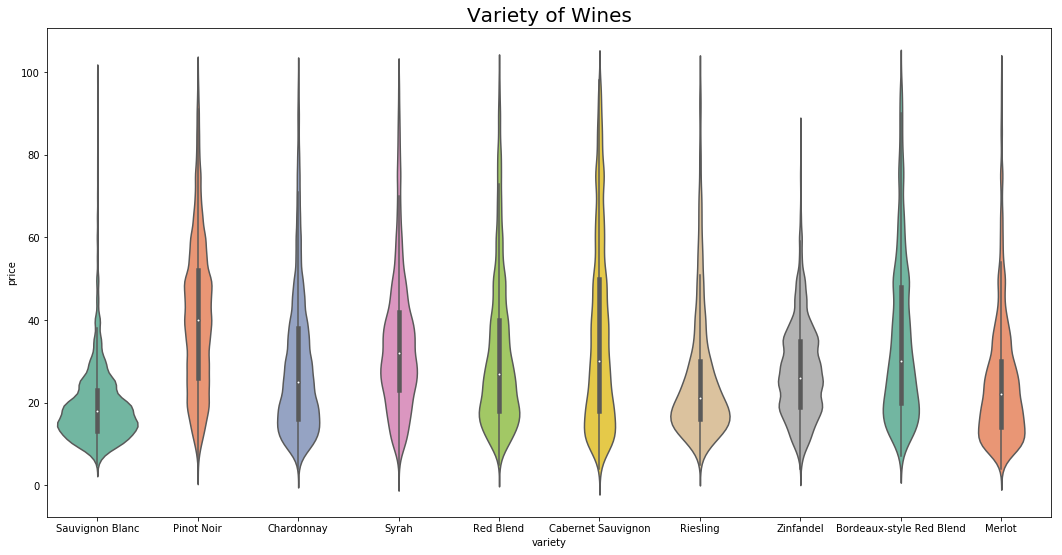

In [103]:
import matplotlib.pyplot as plt
wineprice=wine[wine['price'] < 100]
plt.figure(figsize=(18,9))
m = sns.violinplot(
    x='variety',
    y='price',
    data=wineprice[wineprice.variety.isin(wine.variety.value_counts()[:10].index)],
    palette='Set2'
)
m.set_title("Variety of Wines",fontsize = 20)
m.set_ylable("price",fontsize = 15)
m.set_xticklabels(m.get_xticklabels(), rotation=90)

plt.show()

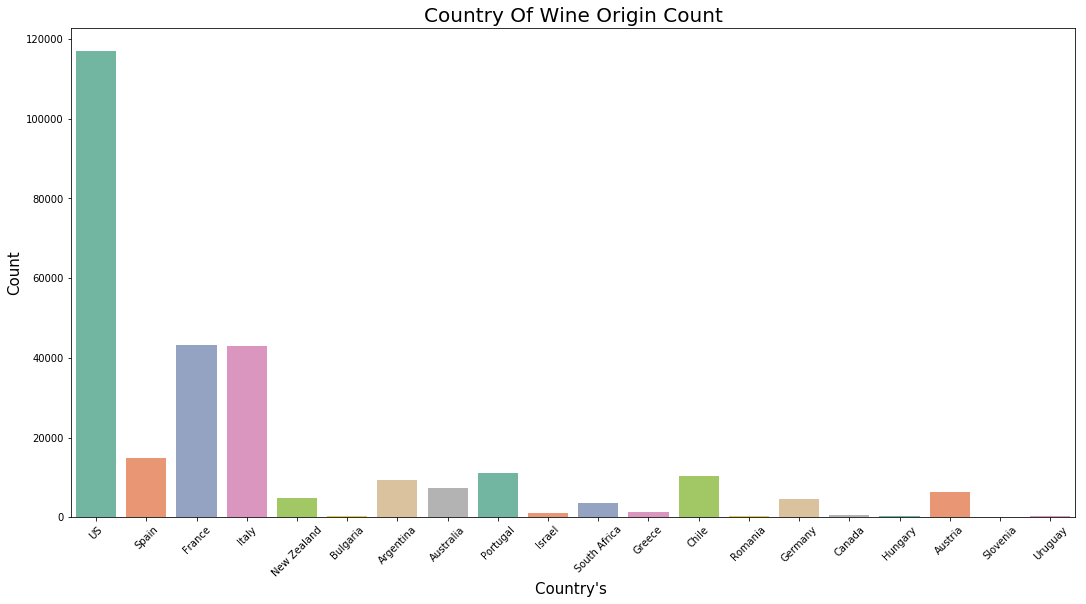

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))

country = wine.country.value_counts()[:20]

g = sns.countplot(x='country', data=wine[wine.country.isin(country.index.values)], palette='Set2')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

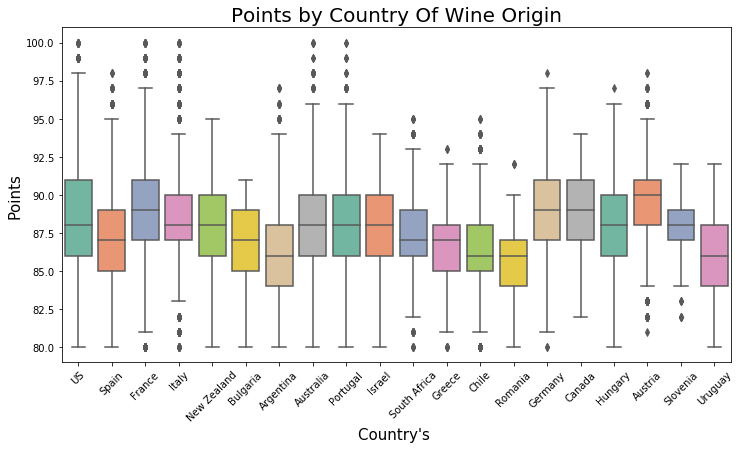

In [82]:
plt.figure(figsize=(12,6))

g1 = sns.boxplot(x='country', y='points',
                   data=wine[wine.country.isin(country.index.values)],palette='Set2')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

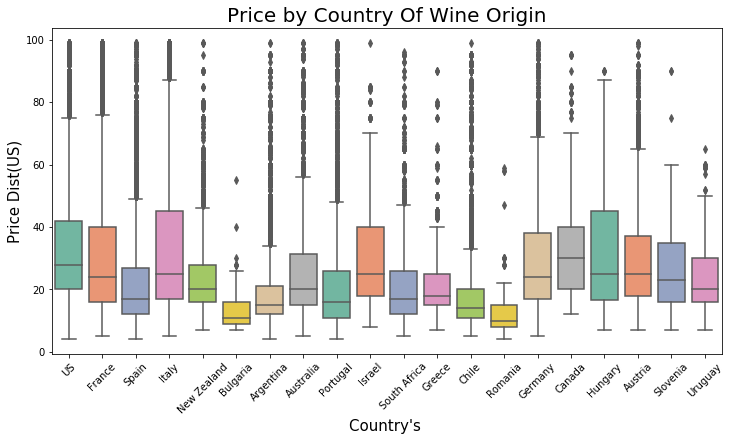

In [90]:
plt.figure(figsize=(12,6))
l = sns.boxplot(x='country', y='price',
                  data=wineprice.loc[(wineprice.country.isin(country.index.values))],
               palette='Set2')
l.set_title("Price by Country Of Wine Origin", fontsize=20)
l.set_xlabel("Country's ", fontsize=15)
l.set_ylabel("Price Dist(US)", fontsize=15)
l.set_xticklabels(l.get_xticklabels(),rotation=45)
plt.show

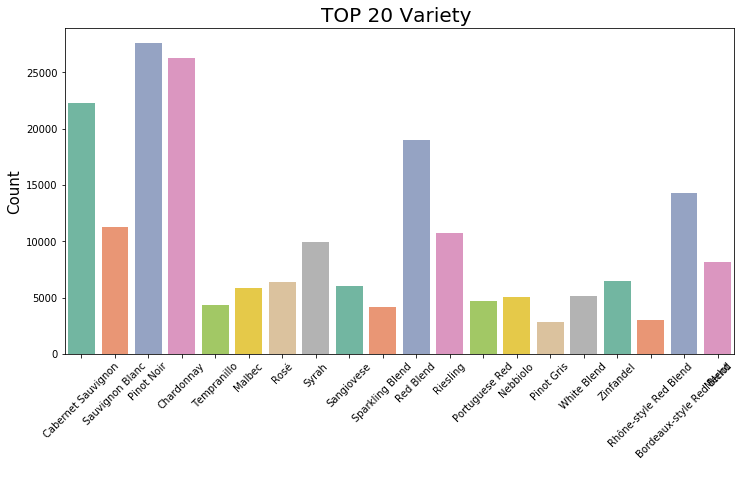

In [88]:
plt.figure(figsize=(12,6))

variety = wine.variety.value_counts()[:20]

g = sns.countplot(x='variety', 
                  data= wine.loc[(wine.variety.isin(variety.index.values))],
                 palette='Set2')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

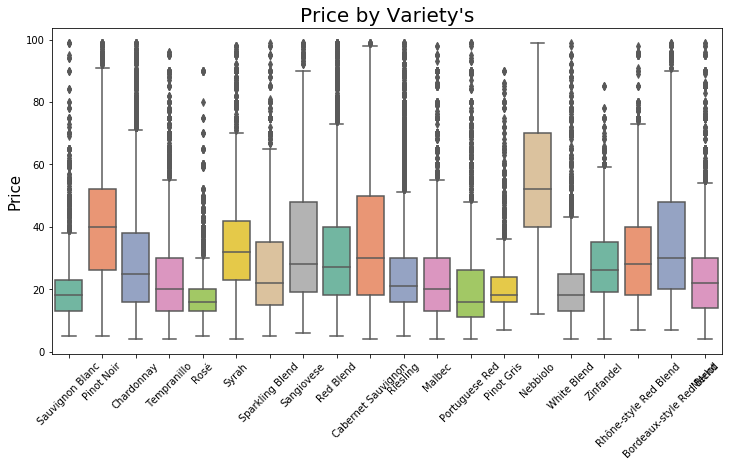

In [86]:
plt.figure(figsize=(12,6))
g1 = sns.boxplot(y='price', x='variety',
                  data=wineprice.loc[(wineprice.variety.isin(variety.index.values))],
                 palette='Set2')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

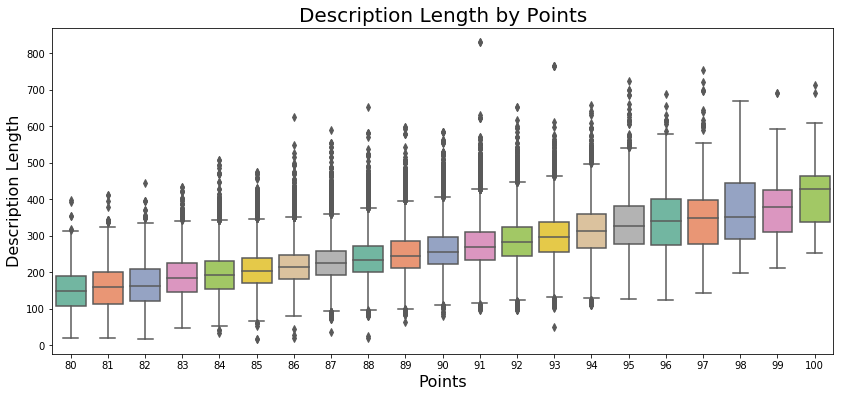

In [92]:
wine1 = wine.assign(desc_length = wine['description'].apply(len))
plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=wine1,palette='Set2')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

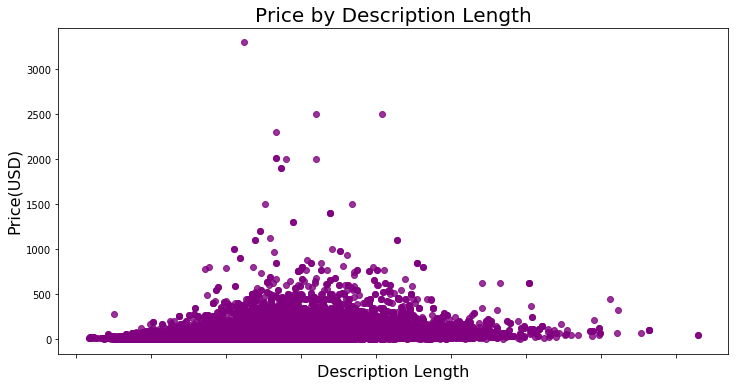

In [95]:
plt.figure(figsize=(12,6))
g = sns.regplot(x='desc_length', y='price',
                data=wine1, fit_reg=False, color = 'purple')
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [115]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Purples',high=0.4)

,country,points,count,min,max,mean
0,France,100,12,150,1500,877.583
1,Germany,98,1,775,775,775
2,France,99,10,159,2300,632.4
3,Australia,99,2,300,850,575
4,Portugal,100,2,450,650,550
5,France,98,43,70,1900,448.814
6,Spain,98,3,440,450,446.667
7,Germany,97,16,245,775,392.562
8,Portugal,99,3,268,426,373.333
9,Italy,100,11,195,550,334.545


In [114]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Purples',high=0.4)

,province,country,points,count,min,max,mean
0,Bordeaux,France,99,1,2300,2300,2300
1,Champagne,France,100,6,250,1400,887.667
2,Bordeaux,France,100,6,150,1500,867.5
3,South Australia,Australia,99,1,850,850,850
4,Rheingau,Germany,98,1,775,775,775
5,Port,Portugal,100,1,650,650,650
6,Bordeaux,France,98,16,70,1900,586.062
7,Burgundy,France,99,1,560,560,560
8,Rheingau,Germany,97,7,445,775,551.571
9,Colares,Portugal,93,1,495,495,495
